In [330]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from colormap import Color
import datetime
import time
import mplleaflet
%matplotlib inline

#logging
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.debug('Test Debug')

In [2]:
# read generic dataset
# sample_flat.csv
sample = pd.read_csv('sample_flat.csv')

In [3]:
test=sample.iloc[0]

In [4]:
timeonly = datetime.datetime.fromtimestamp(test['dates'])

In [5]:
print(timeonly)

2016-01-16 23:34:23


In [6]:
sample['real_time'] = sample.dates.apply(lambda x: datetime.datetime.fromtimestamp(x))

In [39]:
# Frequency of category
# and distinct all the value in the category into category dictionary
group_cat = sample.groupby('categorical')['categorical'].count()
group_cat
cat_dictionary = group_cat.index.values
cat_dictionary

array(['Category00', 'Category01', 'Category02', 'Category03',
       'Category04', 'Category05', 'Category06', 'Category07',
       'Category08', 'Category09'], dtype=object)

In [8]:
sample

,names,dates,latitude,longitude,categorical,quant1,quant2,quant3,real_time
0,b'Rawad',1453008863,-19.988651,-41.435565,Category01,1.933239,6.052785,6105.123120,2016-01-16 23:34:23
1,b'Eurma',1471778579,-8.593256,27.742604,Category00,1.520733,-11.065076,143.902725,2016-08-21 06:22:59
2,b'Taleia',1473613446,-67.463164,-109.366796,Category04,1.863466,11.437340,2019.370225,2016-09-11 12:04:06
3,b'Niley',1481194251,-7.537010,-32.218540,Category03,0.745431,19.415543,3225.920647,2016-12-08 04:50:51
4,b'Acey',1454402794,-17.116866,2.949914,Category05,1.031100,17.714492,4976.099324,2016-02-02 02:46:34
5,b'Obert',1463099041,86.050560,-138.759294,Category00,0.820424,-28.240086,9725.990286,2016-05-12 19:24:01
6,b'Kadel',1481065733,53.965137,-174.545084,Category04,3.485479,9.613104,8133.741192,2016-12-06 17:08:53
7,b'Jaiyanna',1461933123,37.910119,-135.568743,Category04,0.635373,-0.084906,8340.323743,2016-04-29 07:32:03
8,b'Haylei',1469302986,-79.231809,168.419140,Category07,0.802668,17.993627,4695.368570,2016-07-23 14:43:06
9,b'Ayhem',1454702028,33.318067,56.065283,Category09,2.353746,-9.800971,1558.909278,2016-02-05 13:53:48


In [9]:
plt.hist(group_category)

NameError: name 'group_category' is not defined

In [10]:
# preprocessed dates data for bining
min_date = sample.dates.min()
print(min_date)
max_date = sample.dates.max()
print(max_date)
#print(max_date - min_date)
binNum=12
bin_range = np.linspace(min_date,max_date,binNum)

bin_quant_arr = []
# calculate the quantity variables for each bins
for i in range(len(bin_range)-1):
    print(bin_range[i])
    bin_sample = sample[(sample['dates']>=bin_range[i])&(sample['dates']<bin_range[i+1])]
    print(len(bin_sample))
    bin_sums = bin_sample.groupby('categorical')['quant1'].sum()
    bin_mean = bin_sample.groupby('categorical')['quant1'].mean()
    #bin_sd = bin_sample.groupby('categorical')['quant1'].sd()
    bin_quant_arr.append((bin_sums,bin_mean))

1451611766
1483138417
1451611766.0
964
1454477825.18
902
1457343884.36
843
1460209943.55
924
1463076002.73
888
1465942061.91
914
1468808121.09
903
1471674180.27
924
1474540239.45
946
1477406298.64
883
1480272357.82
908


In [30]:
#plot the category
# get unique values for category
categories = sample.categorical.unique()
# prepare the array
bin_cat_arr = {}
bin_cat_mean = {}
for cat in categories:
    bin_cat_arr[cat] = []
    bin_cat_mean[cat] = []

for bin_quant in bin_quant_arr:    
    bin_quant_obs = bin_quant[0]
    bin_mean_obs = bin_quant[1]
    for cat in categories:
        if cat in bin_quant_obs.index:
            bin_cat_arr[cat].append(bin_quant_obs[cat]) 
            bin_cat_mean[cat].append(bin_mean_obs[cat])
        else:
            bin_cat_arr[cat].append(0)
            bin_cat_mean[cat].append(0)


In [91]:
sample.groupby('names')['names'].count().sort_values(ascending=False)

names
b'Ordell'       3
b'Aneria'       3
b'Nechuma'      3
b'Kaelob'       3
b'Dinos'        3
b'Kiondra'      3
b'Jorrin'       3
b'Mayrin'       3
b'Jamilia'      3
b'Annalise'     3
b'Taidyn'       3
b'Phallyn'      3
b'Versel'       2
b'Vidella'      2
b'Victoria'     2
b'Shanora'      2
b'Aythan'       2
b'Tattianna'    2
b'Kurstin'      2
b'Netanel'      2
b'Jissele'      2
b'Jadenn'       2
b'Gerelene'     2
b'Jaece'        2
b'Tawana'       2
b'Daquana'      2
b'Nellye'       2
b'Shaquela'     2
b'Getzemany'    2
b'Rilah'        2
               ..
b'Mikel'        1
b'Mikeal'       1
b'Mikaylynn'    1
b'Mikale'       1
b'Mikhel'       1
b'Mikal'        1
b'Mikaiyah'     1
b'Mikaili'      1
b'Mijoi'        1
b'Mijael'       1
b'Mihajlo'      1
b'Mikeyah'      1
b'Mikiala'      1
b'Milliona'     1
b'Mildred'      1
b'Miller'       1
b'Millennia'    1
b'Mille'        1
b'Milla'        1
b'Mileva'       1
b'Milenna'      1
b'Milaya'       1
b'Mikiya'       1
b'Milaun'       1
b'Mi

In [12]:
bin_quant_arr
bin_cat_arr

{'Category00': [array([ 148.94160365,  141.4862552 ,  187.21445696,  178.40565292,
          208.35754429,  170.51897927,  167.95382059,  180.13921931,
          152.35371684,  162.13882734]),
  array([ 134.31258511,  145.32430992,  150.57688699,  183.59252374,
          149.24835406,  172.92882168,  165.82290772,  173.33311194,
          128.05224643,  133.08990024]),
  array([ 160.39774042,  144.15477552,  130.59732232,  134.95405717,
          152.83241148,  151.61213424,  130.77329999,  159.4301052 ,
          162.45448632,  132.42540948]),
  array([ 147.36457541,  164.12631236,  188.56832522,  159.4932359 ,
          165.59362737,  156.7580574 ,  179.36406952,  142.39340054,
          178.41127753,  154.80946205]),
  array([ 165.50113923,  127.09656131,  152.57816498,  172.80477746,
          169.25386087,  155.98638853,  170.78724019,  166.65053426,
          146.53032608,  136.60367587]),
  array([ 146.90148773,  130.7454935 ,  152.90397437,  147.79061719,
          189.0614088 

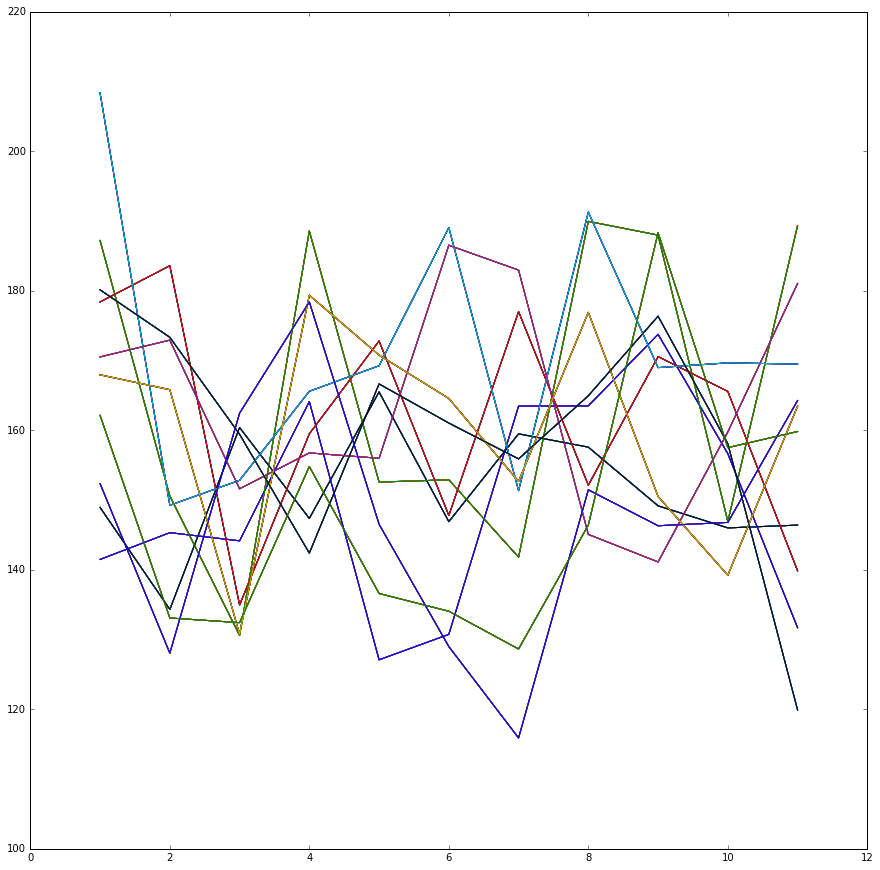

In [18]:
sample_fig = plt.figure(figsize=(15,15));
for cat in categories:
    plt.plot(range(1,12),bin_cat_arr[cat],'-')

In [323]:
def quantityBin(quant,binNumber=12):
    # preprocessed dates data for bining
    min_date = sample.dates.min()
    #print(min_date)
    max_date = sample.dates.max()
    #print(max_date)
    #print(max_date - min_date)
    binNum=binNumber+1
    bin_range = np.linspace(min_date,max_date,binNum)

    bin_quant_arr = []
    # calculate the quantity variables for each bins
    for i in range(len(bin_range)-1):
        #print(bin_range[i])
        bin_sample = sample[(sample['dates']>=bin_range[i])&(sample['dates']<bin_range[i+1])]
        #print(len(bin_sample))
        bin_sums = bin_sample.groupby('categorical')[quant].sum()
        bin_mean = bin_sample.groupby('categorical')[quant].mean()
        bin_max = bin_sample.groupby('categorical')[quant].min()
        bin_min = bin_sample.groupby('categorical')[quant].max()
        bin_sd = bin_sample.groupby('categorical')[quant].std()
        zipped = pd.concat([bin_sums,bin_mean,bin_max,bin_min,bin_sd],join='inner',axis=1)
        bin_quant_arr.append(zipped)
    
    #print(bin_quant_arr)
    
    categories = sample.categorical.unique()
    # prepare the array
    bin_cat_arr = {}
    for cat in categories:
        #bin_cat_arr[cat] = pd.DataFrame()
        bin_cat_arr[cat] = []

    for bin_quant in bin_quant_arr:
        for cat in categories:
            if cat in bin_quant.index:                
                bin_cat_arr[cat].append(bin_quant.loc[cat]) 
                #bin_cat_arr[cat] = pd.concat([bin_cat_arr[cat],bin_quant.loc[cat]],join='inner',axis=1)
            else:
                bin_cat_arr[cat].append(np.zeros(5))
                #bin_cat_arr[cat] = pd.concat([bin_cat_arr[cat],np.zeros(5)],join='inner',axis=1)
    return (bin_cat_arr)    

In [383]:
def show_quantity(categories,quant,shows,binNumber):
    sample_fig = plt.figure(figsize=(15,15));
    sample_ax = sample_fig.add_subplot(1,1,1)
    qBin = quantityBin(quant,binNumber)
    qBin = pd.DataFrame(qBin)
#    print()
#    ax.scatter(obs_stops['stop_lon'], obs_stops['stop_lat'],c=obs_stops.frequency,cmap=plt.get_cmap('viridis'),vmin=min_freq,vmax=max_freq,s=100,alpha=0.5,edgecolors='none')
    color='viridis'
    # define color map for all categories
    cm = plt.get_cmap(color)
    colorArr = {}
    norm = mpl.colors.Normalize(vmin=0,vmax=len(categories))
    for i in range(len(categories)):
        color = cm(norm(i))
        colorArr[categories[i]] = color

    patch_array = []
    for cat in categories:
        bin_cat_arr = qBin[cat]
        plot_arr = {}
        # initialize plot_arr
        for i in range(len(bin_cat_arr[0].index)):
            plot_arr[i] = []
        for bin_cat in bin_cat_arr:
            for i in range(len(bin_cat.index)):
                plot_arr[i].append(bin_cat.values[i])
        
        if 'Mean' in shows:
            sample_ax.plot(range(1,len(plot_arr[1])+1),plot_arr[1],'-',c=colorArr[cat])
        
        if '1-SD' in shows:
            sample_ax.plot(range(1,len(plot_arr[1])+1),np.array(plot_arr[1])-np.array(plot_arr[4]),c=colorArr[cat],linestyle='--')
            sample_ax.plot(range(1,len(plot_arr[1])+1),np.array(plot_arr[1])+np.array(plot_arr[4]),c=colorArr[cat],linestyle='--')
        if 'Min' in shows:
            sample_ax.plot(range(1,len(plot_arr[2])+1),plot_arr[2],'-.',c=colorArr[cat])
        if 'Max' in shows:
            sample_ax.plot(range(1,len(plot_arr[3])+1),plot_arr[3],'-.',c=colorArr[cat])

        patch_array.append(mpl.patches.Patch(color=colorArr[cat],label=cat))

    sample_ax.legend(handles=patch_array, loc='center left', bbox_to_anchor=(1, 0.5)) 
            
#bin_cat_arr['Category00']

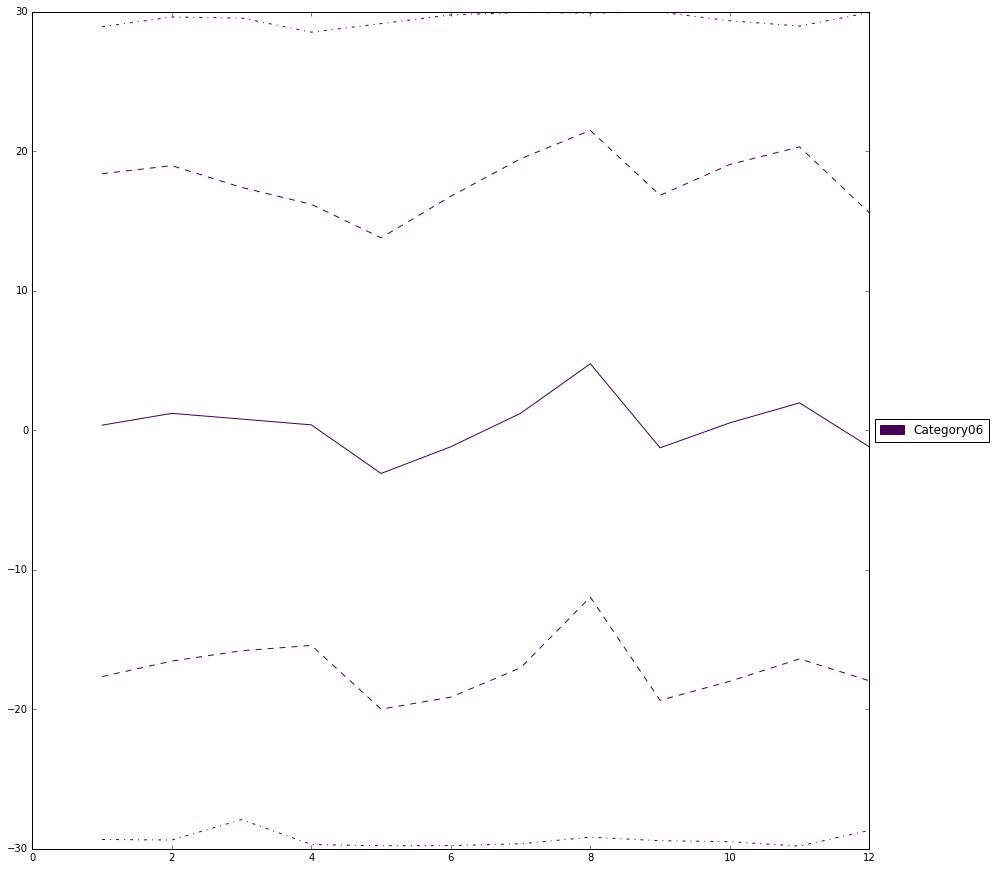

In [404]:
import ipywidgets as widgets
selectCategory = widgets.SelectMultiple(
    options = cat_dictionary.tolist(),
    value=[cat_dictionary[0]],
    description='Category'
)

dropdownQuantity = widgets.Dropdown(
    options = ['quant1','quant2','quant3'],
    value='quant1',
    description='Quantity Column'
)

selectCustomViz = widgets.SelectMultiple(
    options = ['Mean','Min','Max','1-SD'],
    value=['Mean','1-SD'],
    description='Show'
)

sliderBin = widgets.IntSlider(
    value=12,
    min=12,
    max=80,
    step=1,
    description='Date Binning:',
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white'
)

widgets.interact(show_quantity,categories=selectCategory,quant=dropdownQuantity,shows=selectCustomViz,binNumber=sliderBin)

In [464]:
# function to plot the trees based on spatial bining
def spatial_bin_plot(data,category,quantity,bin_step=50):
    # Binning base on spatial
    
    # filter the data by category
    data = data[data['categorical'].isin(category)]    
    minlat = data['latitude'].min();
    maxlat = data['latitude'].max();
    minlong = data['longitude'].min();
    maxlong = data['longitude'].max();
    #print(minlat,maxlat,minlong,maxlong)
    # make range for Latitude
    # set step
    xstep = bin_step
    ystep = bin_step
    latBin = np.linspace(minlat,maxlat,xstep);
    longBin = np.linspace(minlong,maxlong,ystep)
    logger.debug(latBin)
    logger.debug(longBin)

    quantBinArr = []
    quantmeanArr = []
    quantsumArr = []
    #treesWithoutVacant = trees.filter_ne('Tree Species','vacant site large')
    for x in range(latBin.size):    
        if(x < latBin.size-1):
            latData = data[(data['latitude']>latBin[x])&(data['latitude']<=latBin[x+1])]
            latmean = (latBin[x]+latBin[x+1])/2
            for y in range(longBin.size):
                if(y < longBin.size-1):
                    areaData = latData[(latData['longitude']>longBin[y])&latData['longitude']<longBin[y+1]]
                    # get mean for the quantity area bin
                    quantmean = areaData[quantity].mean()
                    quantsum = areaData[quantity].sum()
                    if areaData.shape[0] > 0:
                        quantmeanArr.append(quantmean)
                        quantsumArr.append(quantsum)
                        longmean = (longBin[y]+longBin[y+1])/2
                        quantBinArr.append({'lat': latmean, 'long': longmean, 'quantmean': quantmean, 'quantsum': quantsum})

    dataFig = plt.figure(figsize=(15,15))
    loc_ax = dataFig.add_subplot(1,1,1)
#    loc_ax.set_title('Distribution of Most Common Trees accross Spatial Binning: {}x{} square'.format(xstep,ystep))
    loc_ax.set_xlabel('Longitude')
    loc_ax.set_ylabel('Latitude')
    
    minMean = np.array(quantmeanArr).min()
    maxMean = np.array(quantmeanArr).max()
    # calculate the scale
    # we scale it using 8 level
    scale = maxMean - minMean / 8
    
    for quantBin in quantBinArr:
        loc_ax.scatter(quantBin['long'],quantBin['lat'],s=quantBin['quantmean']/scale*300)

    return dataFig


In [466]:
spatialFig = spatial_bin_plot(sample,['Category00'],'quant3',20)
mplleaflet.display(fig=spatialFig)

In [455]:
?mplleaflet.display